# 타이타닉 생존자 예측

## 기본 정보 확인 및 전처리

In [1]:
import pandas as pd
titanic_df = pd.read_csv('./data/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

# null 값 유무: Age, Cabin Embarked
# 데이터타입: Object(Name, Sex, Ticket,Cabin,Embarked), 그 외 숫자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### null값 -> fillna

In [3]:
# null값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [4]:
print('Sex 값 분포: ',titanic_df['Sex'].value_counts)
print('\n Cabin 값 분포: ',titanic_df['Cabin'].value_counts)
print('\n Embarked 값 분포: ',titanic_df['Embarked'].value_counts)

Sex 값 분포:  <bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

 Cabin 값 분포:  <bound method IndexOpsMixin.value_counts of 0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object>

 Embarked 값 분포:  <bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>


### 규칙성 있는 문자형 데이터 -> 범주화

In [5]:
# Cabin 칼럼 가공 -> 앞글자만 따도록
def for_cabin (x):
    x = x[:1]
    return x

titanic_df['Cabin'] = titanic_df['Cabin'].apply(for_cabin)
titanic_df['Cabin']

# 교수님 버전: titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [6]:
titanic_df.describe()

# 숫자형 데이터들 확인했을 때, Age 널값이 있어서 혼자 count 다르고
# max 값들 다 다름

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df.describe(include='all')

# 문자형 데이터들 봤을 때,
# 범주형 데이터라고 볼 수 있는 건 Sex, Embarked임
# 그 외 Name, Ticket, Cabin의 경우 범주형은 아닌 것으로 보인다. -> 뭐라고 부르는지 모르겠음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,9,4
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,N,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

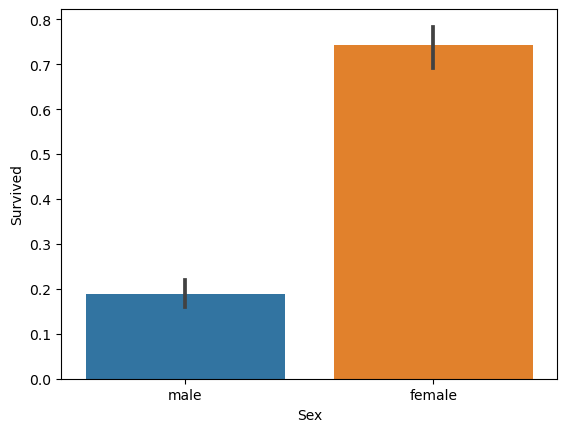

In [9]:
import seaborn as sns

sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

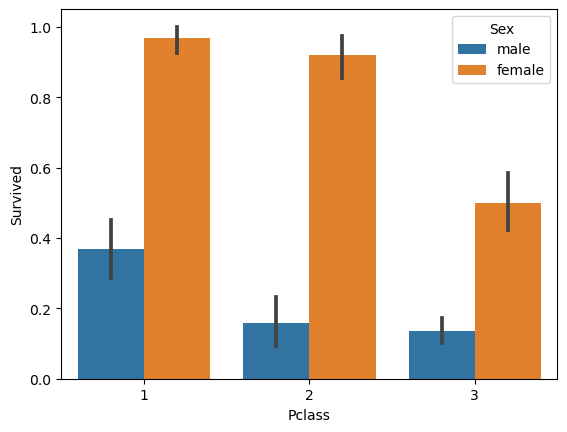

In [10]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

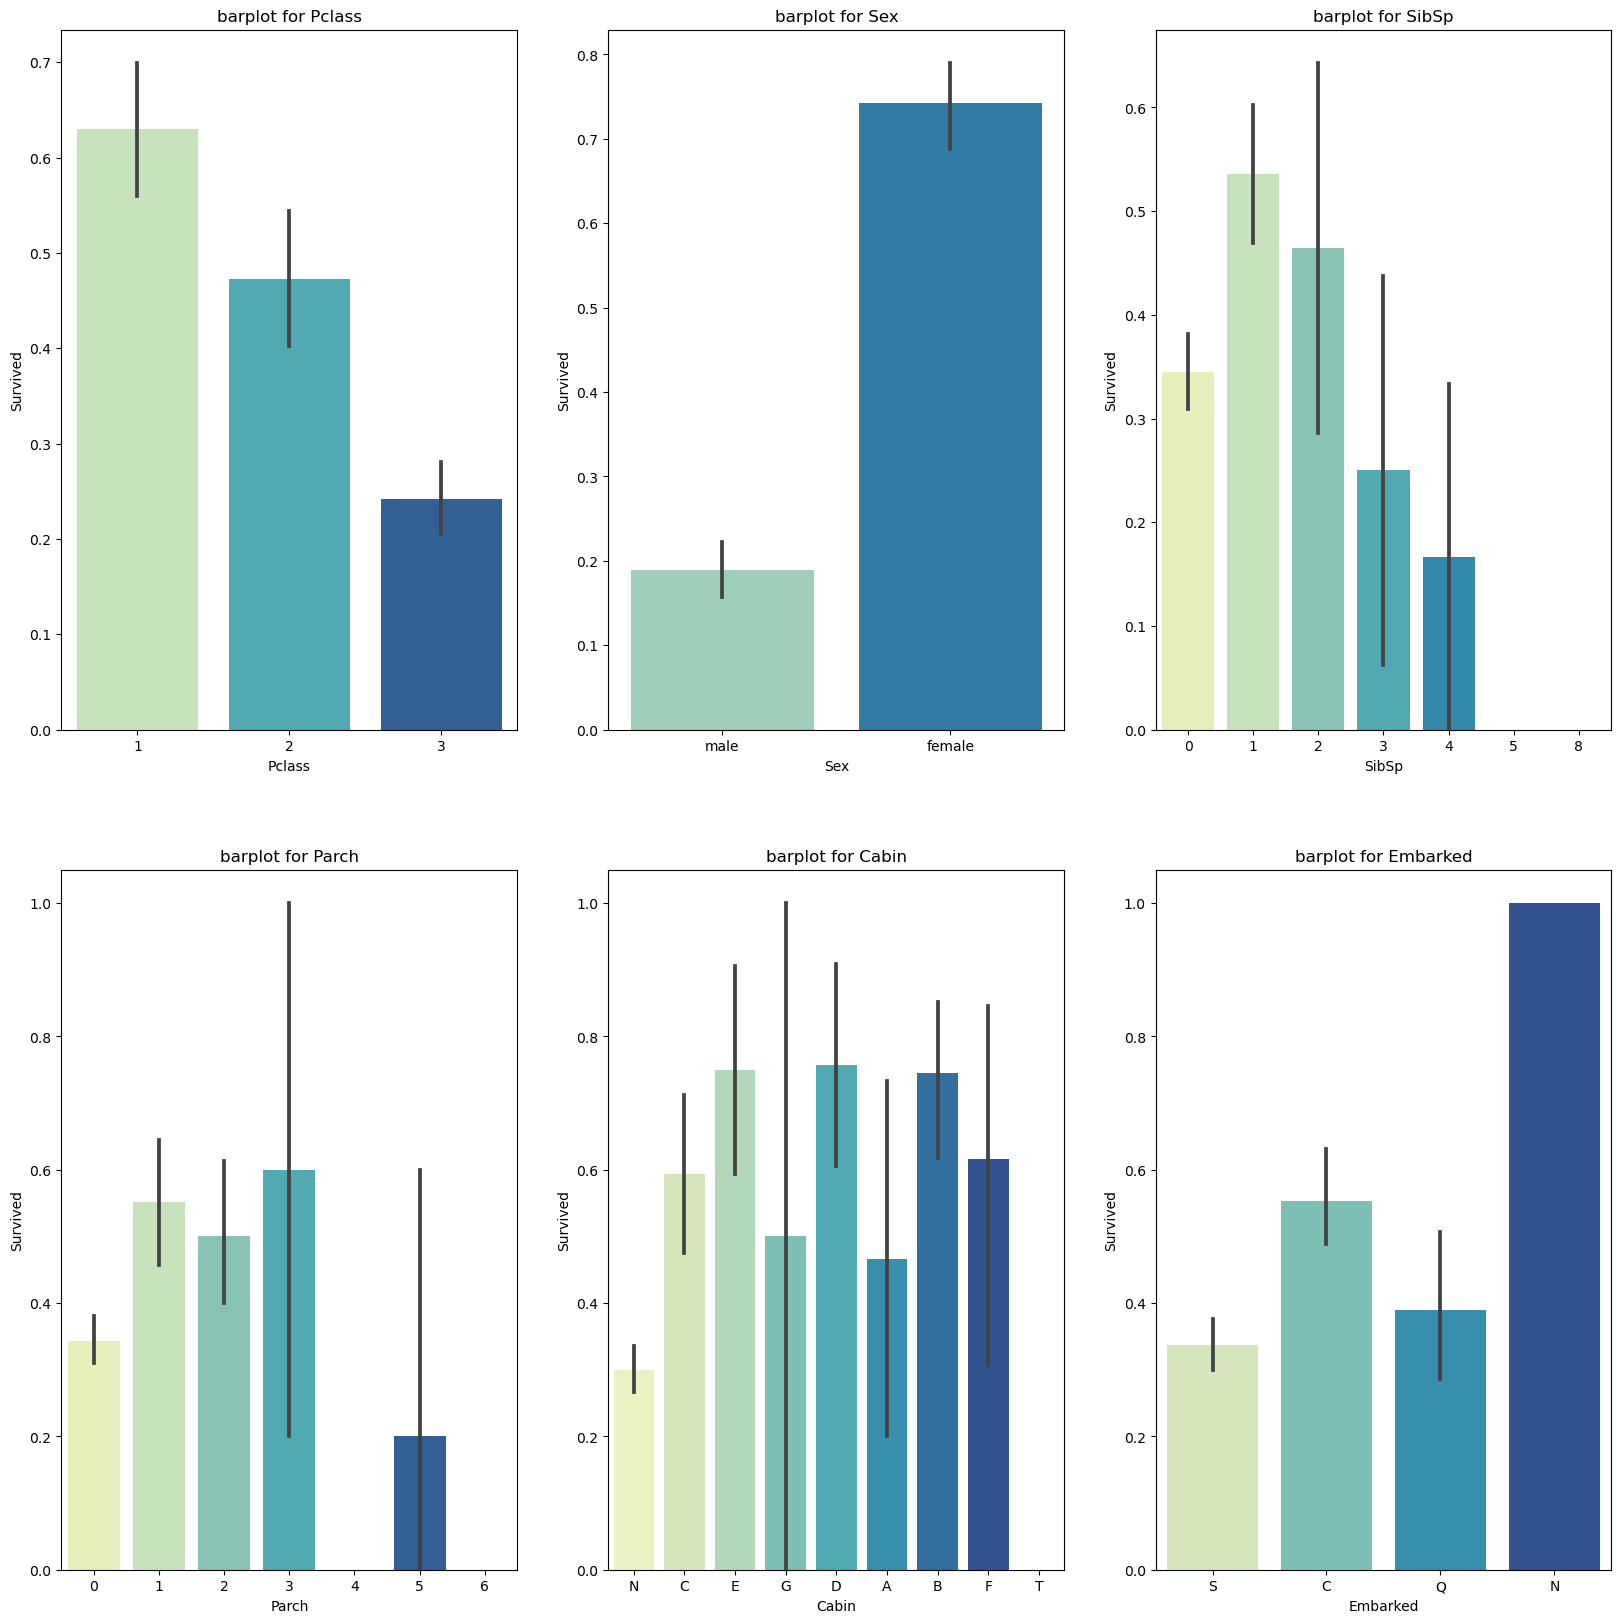

In [11]:
import matplotlib.pyplot as plt
columns =['Pclass', 'Sex', 'SibSp','Parch', 'Cabin', 'Embarked']
columns2 = ['Age','Fare']

fig,ax = plt.subplots(2,3,figsize=(20,20))
for idx,col in enumerate(columns):
    row_index = idx // 3
    col_index = idx % 3
    
    titanic_df.groupby([col,'Survived'])['Survived'].count()
    sns.barplot(x=col,y='Survived',data=titanic_df,ax = ax[row_index,col_index],palette='YlGnBu')
    ax[row_index,col_index].set_title('barplot for %s' % col)

plt.show()

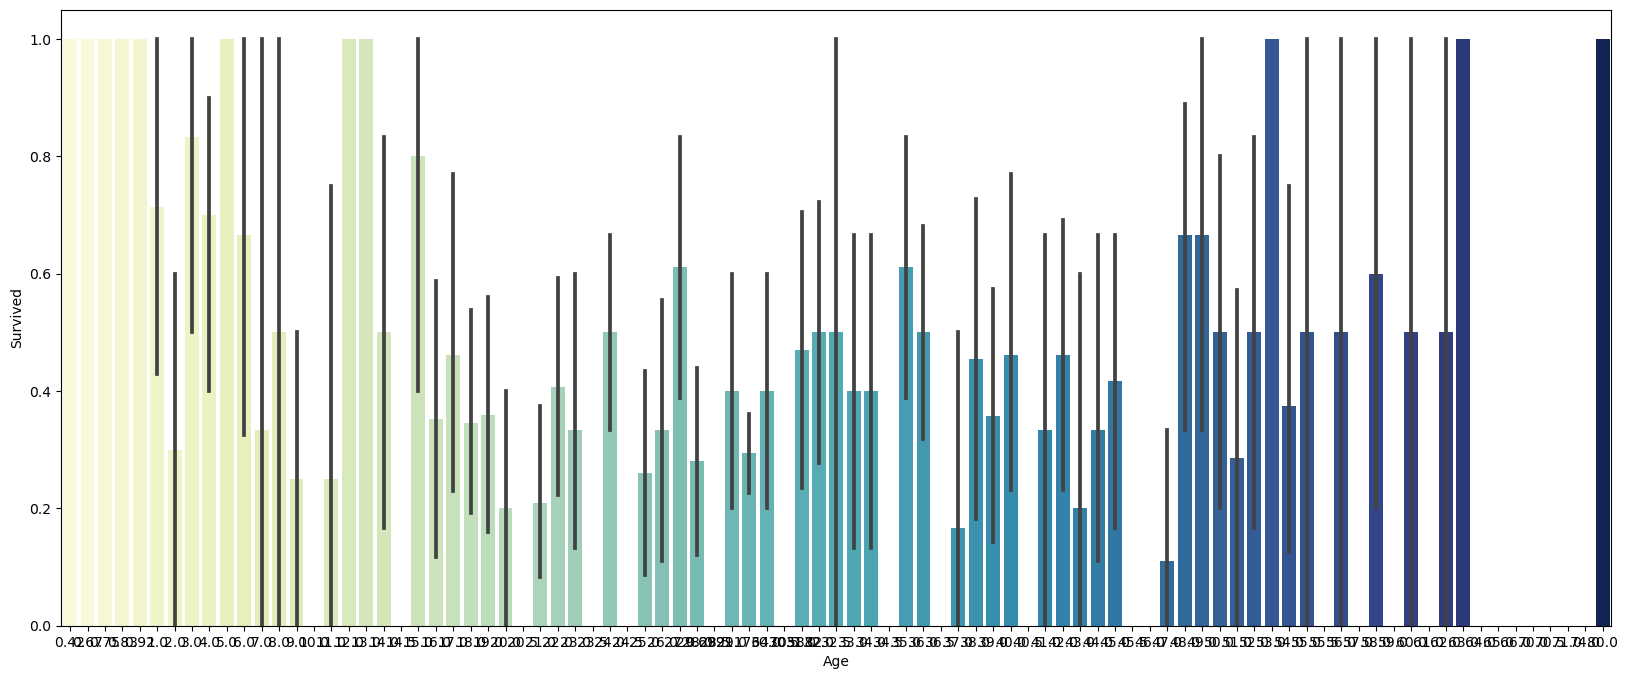

In [12]:
fig = plt.figure(figsize=(20,8))
sns.barplot(x='Age',y='Survived',data=titanic_df,palette='YlGnBu')
plt.show()

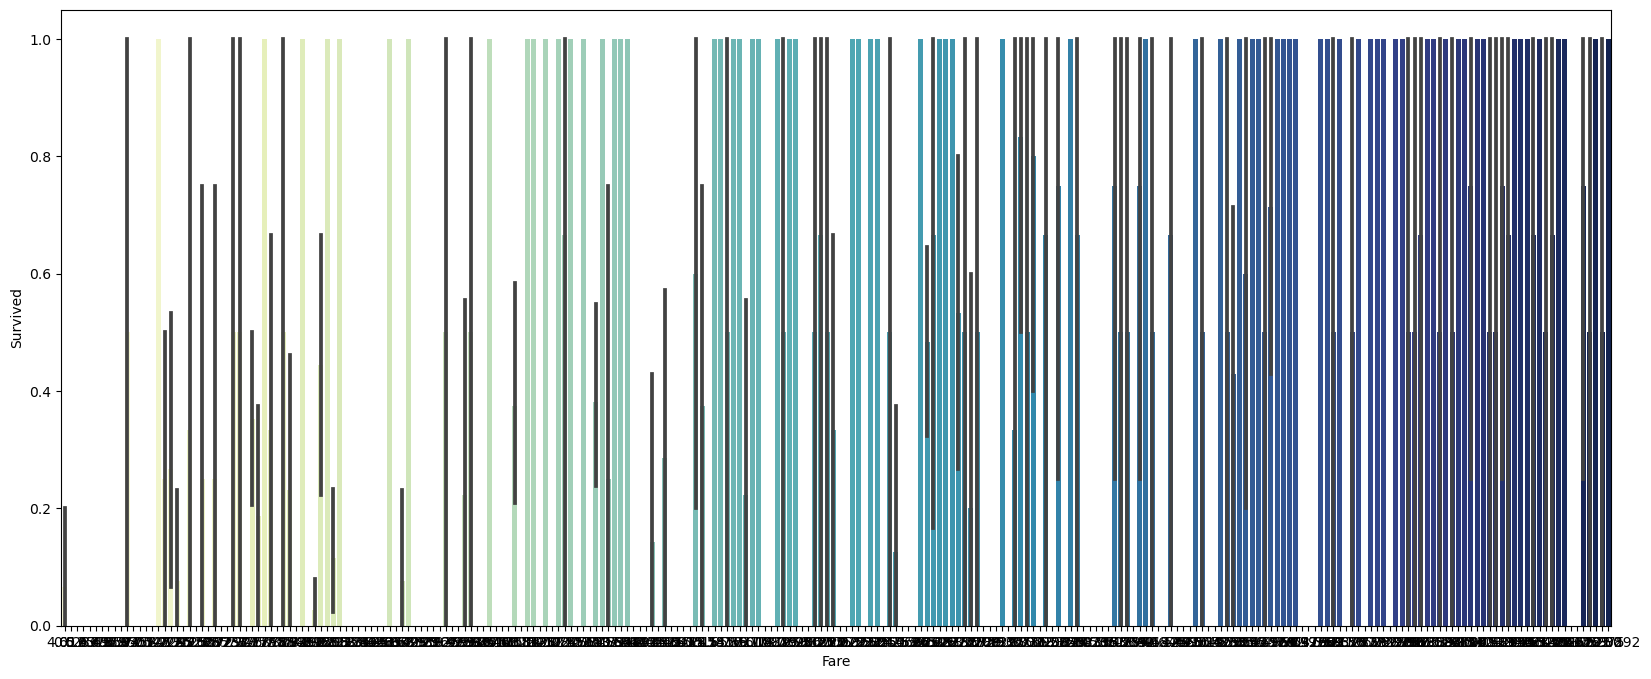

In [13]:
fig = plt.figure(figsize=(20,8))
sns.barplot(x='Fare',y='Survived',data=titanic_df,palette='YlGnBu')
plt.show()

### 나이 -> 범주화

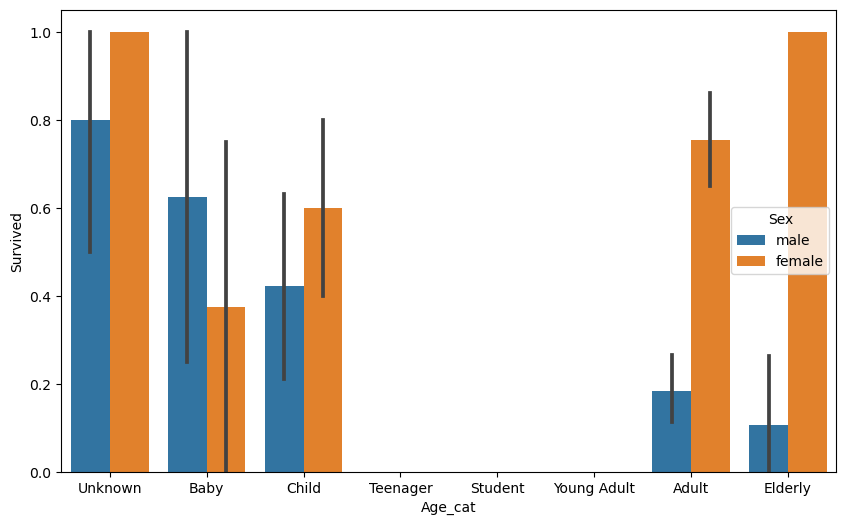

In [14]:
def get_category(age):
    cat = ""
    if age <= 1: cat = 'Unknown'
    elif age <= 3: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 38: cat = 'Teenage'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

plt.figure(figsize=(10,6))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

### 범주형 문자형(categorical objects) -> 인코딩

In [15]:
from sklearn import preprocessing
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature].astype(str))
        dataDF[feature] = le.transform(dataDF[feature].astype(str))
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


### 위에서 사용한 함수들 이쁘게 정리

In [22]:
# null값 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data Preprocessing 함수 응용
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [23]:
titanic_df = pd.read_csv('./data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

# 머신러닝

### 데이터셋 준비

In [98]:
from sklearn.model_selection import train_test_split
import numpy as np

titanic_df = pd.read_csv('./data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,
                                               test_size=0.2,random_state=11)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### 모델 학습

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 의사결정나무, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

#DecisionTreeClassifier
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.787709
RandomForestClassifier 정확도: 0.854749
LogisticRegression 정확도: 0.849162


/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 교차 검증

* KFold

In [105]:
from sklearn.model_selection import train_test_split
import numpy as np

titanic_df = pd.read_csv('./data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [113]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


n_iter = 0
K_accuracy_dt = []               
K_accuracy_rf = []
K_accuracy_lr = []

for train_index, test_index in KFold(n_splits=5).split(X_titanic_df): 
    X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
    y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
    
    dt_clf = DecisionTreeClassifier(random_state=11)
    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression(random_state=11)
        
    dt_clf.fit(X_train,y_train)
    rf_clf.fit(X_train,y_train)
    lr_clf.fit(X_train,y_train)

    K_accuracy_dt.append(accuracy_score(dt_clf.predict(X_test),y_test))
    K_accuracy_rf.append(accuracy_score(rf_clf.predict(X_test),y_test))
    K_accuracy_lr.append(accuracy_score(lr_clf.predict(X_test),y_test))
    

/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [114]:
print(np.mean(K_accuracy_dt))
print(np.mean(K_accuracy_rf))
print(np.mean(K_accuracy_lr))

0.782298662984119
0.8148389931579938
0.7878601468834349


In [116]:
# 교수님
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=5)
    scores=[]
    
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        
        #Classifier 학습, 
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)               # 내 코드에서 빠진 부분
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))
        
    mean_score = np.mean(scores)
    print('평균 정확도:',mean_score)
    
exec_kfold(dt_clf,folds=5)
        

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.782298662984119


* Stratified

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


n_iter = 0
SK_accuracy_dt = []                # 머신러닝 학습을 n번 하고 정확도 각각을 내서 평균낼 거니까 정확도 n개 담을 리스트 준비
SK_accuracy_rf = []
SK_accuracy_lr = []

for train_index, test_index in StratifiedKFold(n_splits=5).split(X_titanic_df,y_titanic_df):
    # 훈련 세트와 테스트 세트 데이터 설정, train_test_split은 리턴값이 4개이기 때문에 이 경우에 사용할 수 없다
    train_X = X_titanic_df[train_index]
    test_X = X_titanic_df[test_index]
    train_y = y_titanic_df[train_index]
    test_y = y_titanic_df[test_index]
    
    dt_clf = DecisionTreeClassifier(random_state=11)
    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression(random_state=11)
        
    dt_clf.fit(train_X,train_y)
    rf_clf.fit(train_X,train_y)
    lr_clf.fit(train_X,train_y)
                           
    SK_accuracy_dt.append(dt_clf.score(test_X,test_y))
    SK_accuracy_rf.append(rf_clf.score(test_X,test_y))
    SK_accuracy_lr.append(lr_clf.score(test_X,test_y))
    

/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [64]:
print(np.mean(SK_accuracy_dt))
print(np.mean(SK_accuracy_rf))
print(np.mean(SK_accuracy_lr))

0.7879291946519366
0.8137153976523758
0.7844956374364446


* cross-val-score()

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
    
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)
    
# dt_clf.fit(train_X,train_y)
# rf_clf.fit(train_X,train_y)
# lr_clf.fit(train_X,train_y)
                        
CV_scores_dt = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,scoring='accuracy',cv=5)
CV_scores_rf = cross_val_score(rf_clf,X_titanic_df,y_titanic_df,scoring='accuracy',cv=5)
CV_scores_lr = cross_val_score(lr_clf,X_titanic_df,y_titanic_df,scoring='accuracy',cv=5)



/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [68]:
print(np.mean(CV_scores_dt))
print(np.mean(CV_scores_rf))
print(np.mean(CV_scores_lr))

0.7879291946519366
0.8137153976523758
0.7844956374364446


In [117]:
# 교수님

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


## 하이퍼파라미터 튜닝

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

from sklearn.model_selection import train_test_split
import numpy as np

titanic_df = pd.read_csv('./data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,
                                               test_size=0.2,random_state=11)

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

* 의사결정나무

In [89]:
import pandas as pd
parameters = {'max_depth':[2,3,4,5],'min_samples_split':[2,3,4]}
grid_dt_clf = GridSearchCV(dt_clf,param_grid = parameters,cv=5, refit=True)
grid_dt_clf.fit(X_train,y_train)

scores_df_dt = pd.DataFrame(grid_dt_clf.cv_results_)
scores_df_dt[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_split': 2}",0.758446,10,0.734266,0.769231,0.753521
1,"{'max_depth': 2, 'min_samples_split': 3}",0.758446,10,0.734266,0.769231,0.753521
2,"{'max_depth': 2, 'min_samples_split': 4}",0.758446,10,0.734266,0.769231,0.753521
3,"{'max_depth': 3, 'min_samples_split': 2}",0.799173,1,0.790210,0.797203,0.830986
4,"{'max_depth': 3, 'min_samples_split': 3}",0.799173,1,0.790210,0.797203,0.830986
5,"{'max_depth': 3, 'min_samples_split': 4}",0.799173,1,0.790210,0.797203,0.830986
6,"{'max_depth': 4, 'min_samples_split': 2}",0.792199,5,0.734266,0.804196,0.823944
7,"{'max_depth': 4, 'min_samples_split': 3}",0.790791,6,0.734266,0.804196,0.823944
8,"{'max_depth': 4, 'min_samples_split': 4}",0.793588,4,0.734266,0.818182,0.823944
9,"{'max_depth': 5, 'min_samples_split': 2}",0.780971,9,0.727273,0.783217,0.802817


* 랜덤포레스트

In [90]:
import pandas as pd
parameters = {'max_depth':[2,3,4,5],'min_samples_split':[2,3,4]}
grid_rf_clf = GridSearchCV(rf_clf,param_grid = parameters,cv=5, refit=True)
grid_rf_clf.fit(X_train,y_train)

scores_df_rf = pd.DataFrame(grid_rf_clf.cv_results_)
scores_df_rf[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_split': 2}",0.773850,10,0.762238,0.804196,0.774648
1,"{'max_depth': 2, 'min_samples_split': 3}",0.773850,10,0.762238,0.804196,0.774648
2,"{'max_depth': 2, 'min_samples_split': 4}",0.773850,10,0.762238,0.804196,0.774648
3,"{'max_depth': 3, 'min_samples_split': 2}",0.785078,7,0.769231,0.825175,0.767606
4,"{'max_depth': 3, 'min_samples_split': 3}",0.783670,8,0.769231,0.825175,0.767606
5,"{'max_depth': 3, 'min_samples_split': 4}",0.783670,8,0.769231,0.825175,0.767606
6,"{'max_depth': 4, 'min_samples_split': 2}",0.810411,4,0.769231,0.839161,0.823944
7,"{'max_depth': 4, 'min_samples_split': 3}",0.807584,5,0.776224,0.839161,0.823944
8,"{'max_depth': 4, 'min_samples_split': 4}",0.804777,6,0.776224,0.832168,0.816901
9,"{'max_depth': 5, 'min_samples_split': 2}",0.814597,1,0.797203,0.839161,0.830986


* 로지스틱회귀

In [91]:
import pandas as pd
parameters = {'C':[0.1,0.5,1,1.5,2],'max_iter':[100,500]}
grid_lr_clf = GridSearchCV(lr_clf,param_grid = parameters,cv=5, refit=True)
grid_lr_clf.fit(X_train,y_train)

scores_df_lr = pd.DataFrame(grid_lr_clf.cv_results_)
scores_df_lr[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/brielle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.1, 'max_iter': 100}",0.778075,7,0.776224,0.790210,0.746479
1,"{'C': 0.1, 'max_iter': 500}",0.780882,2,0.783217,0.790210,0.746479
2,"{'C': 0.5, 'max_iter': 100}",0.780902,1,0.776224,0.783217,0.774648
3,"{'C': 0.5, 'max_iter': 500}",0.779484,4,0.776224,0.790210,0.781690
4,"{'C': 1, 'max_iter': 100}",0.779494,3,0.776224,0.783217,0.781690
5,"{'C': 1, 'max_iter': 500}",0.778085,6,0.769231,0.790210,0.781690
6,"{'C': 1.5, 'max_iter': 100}",0.779484,4,0.769231,0.797203,0.781690
7,"{'C': 1.5, 'max_iter': 500}",0.778075,7,0.769231,0.797203,0.781690
8,"{'C': 2, 'max_iter': 100}",0.776687,9,0.769231,0.783217,0.774648
9,"{'C': 2, 'max_iter': 500}",0.776667,10,0.769231,0.797203,0.774648


In [119]:
# 교수님

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters,scoring='accuracy',cv=5)

# 학습
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8121


In [121]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
precision = precision_score(y_test,dpredictions)
recall = recall_score(y_test,dpredictions)

print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))
print('테스트 세트에서의 DecisionTreeClassifier 정밀도: {0:.4f}'.format(precision))
print('테스트 세트에서의 DecisionTreeClassifier 재현율: {0:.4f}'.format(recall))

테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8652
테스트 세트에서의 DecisionTreeClassifier 정밀도: 0.8197
테스트 세트에서의 DecisionTreeClassifier 재현율: 0.7937
